In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite DB (creates sales_data.db if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product_name TEXT,
    quantity INTEGER,
    price REAL
)
''')
conn.commit()

In [4]:
# Insert stationery data if table is empty
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Pen", 50, 10.0),
        ("Pencil", 100, 5.0),
        ("Notebook", 30, 50.0),
        ("Eraser", 40, 3.0),
        ("Marker", 20, 25.0),
        ("Pen", 20, 10.0),
        ("Notebook", 15, 50.0),
        ("Pencil", 60, 5.0)
    ]
    cursor.executemany("INSERT INTO sales (product_name, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [6]:
query = """
SELECT product_name AS product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product_name
"""
df = pd.read_sql_query(query, conn)
print("Stationery Sales Summary:")
print(df)

Stationery Sales Summary:
    product  total_qty  revenue
0    Eraser         40    120.0
1    Marker         20    500.0
2  Notebook         45   2250.0
3       Pen         70    700.0
4    Pencil        160    800.0


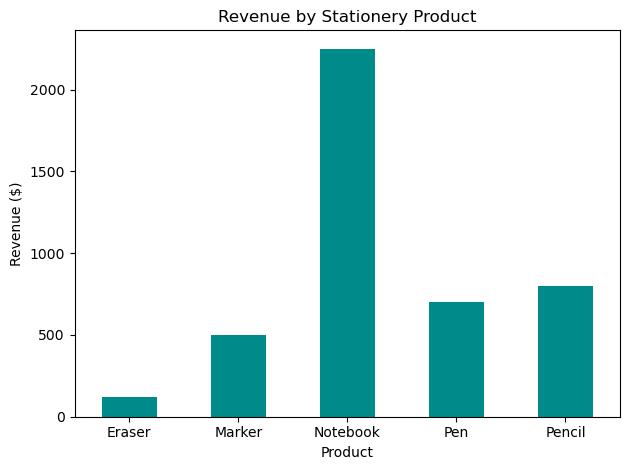

In [11]:

df.plot(kind='bar', x='product', y='revenue', legend=False, color="darkcyan")
plt.title("Revenue by Stationery Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("stationery_sales_chart.png")
plt.show()